In [11]:

import pandas as pd
import alphalens as al

In [12]:

file_path = 'data.csv'  # 文件的路径和文件名
df = pd.read_csv(file_path, encoding='gbk', index_col=0)  # 从CSV文件读取数据
df['日期'] = pd.to_datetime(df['日期'])  # 转换日期格式


In [17]:

# 生成符合Alphalens要求格式的因子值数据
factor = df.set_index(['日期','股票代码'])['总市值']

In [14]:

prices = df.pivot(index='日期', columns='股票代码', values='开盘价')

In [15]:

prices = prices.shift(-1)

In [18]:

factor_data = al.utils.get_clean_factor_and_forward_returns(
                factor=factor,
                prices=prices,
                quantiles=10,
                periods=(1, 10))

Dropped 0.5% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,38980.42,620839.5,1.991105e+05,7.565318e+04,965610,10.015402
2,109892.25,780320.0,2.711780e+05,8.859726e+04,963951,9.998194
3,139090.89,944095.7,3.365771e+05,1.025319e+05,963655,9.995124
4,172915.20,1115602.2,4.110880e+05,1.189422e+05,963941,9.998090
5,213144.00,1381873.4,5.041690e+05,1.417601e+05,964316,10.001980
6,253346.69,1697610.8,6.303827e+05,1.741828e+05,963291,9.991349
7,312092.00,2191082.5,8.288788e+05,2.271405e+05,963605,9.994605
8,424195.20,2992724.5,1.187848e+06,3.350739e+05,963999,9.998692
9,629145.60,5136765.5,1.972242e+06,6.269264e+05,963623,9.994792


Returns Analysis


,1D,10D
Ann. alpha,-0.048,-0.034
beta,-0.263,-0.305
Mean Period Wise Return Top Quantile (bps),-5.105,-4.389
Mean Period Wise Return Bottom Quantile (bps),15.562,14.055
Mean Period Wise Spread (bps),-20.667,-18.573


<Figure size 640x480 with 0 Axes>

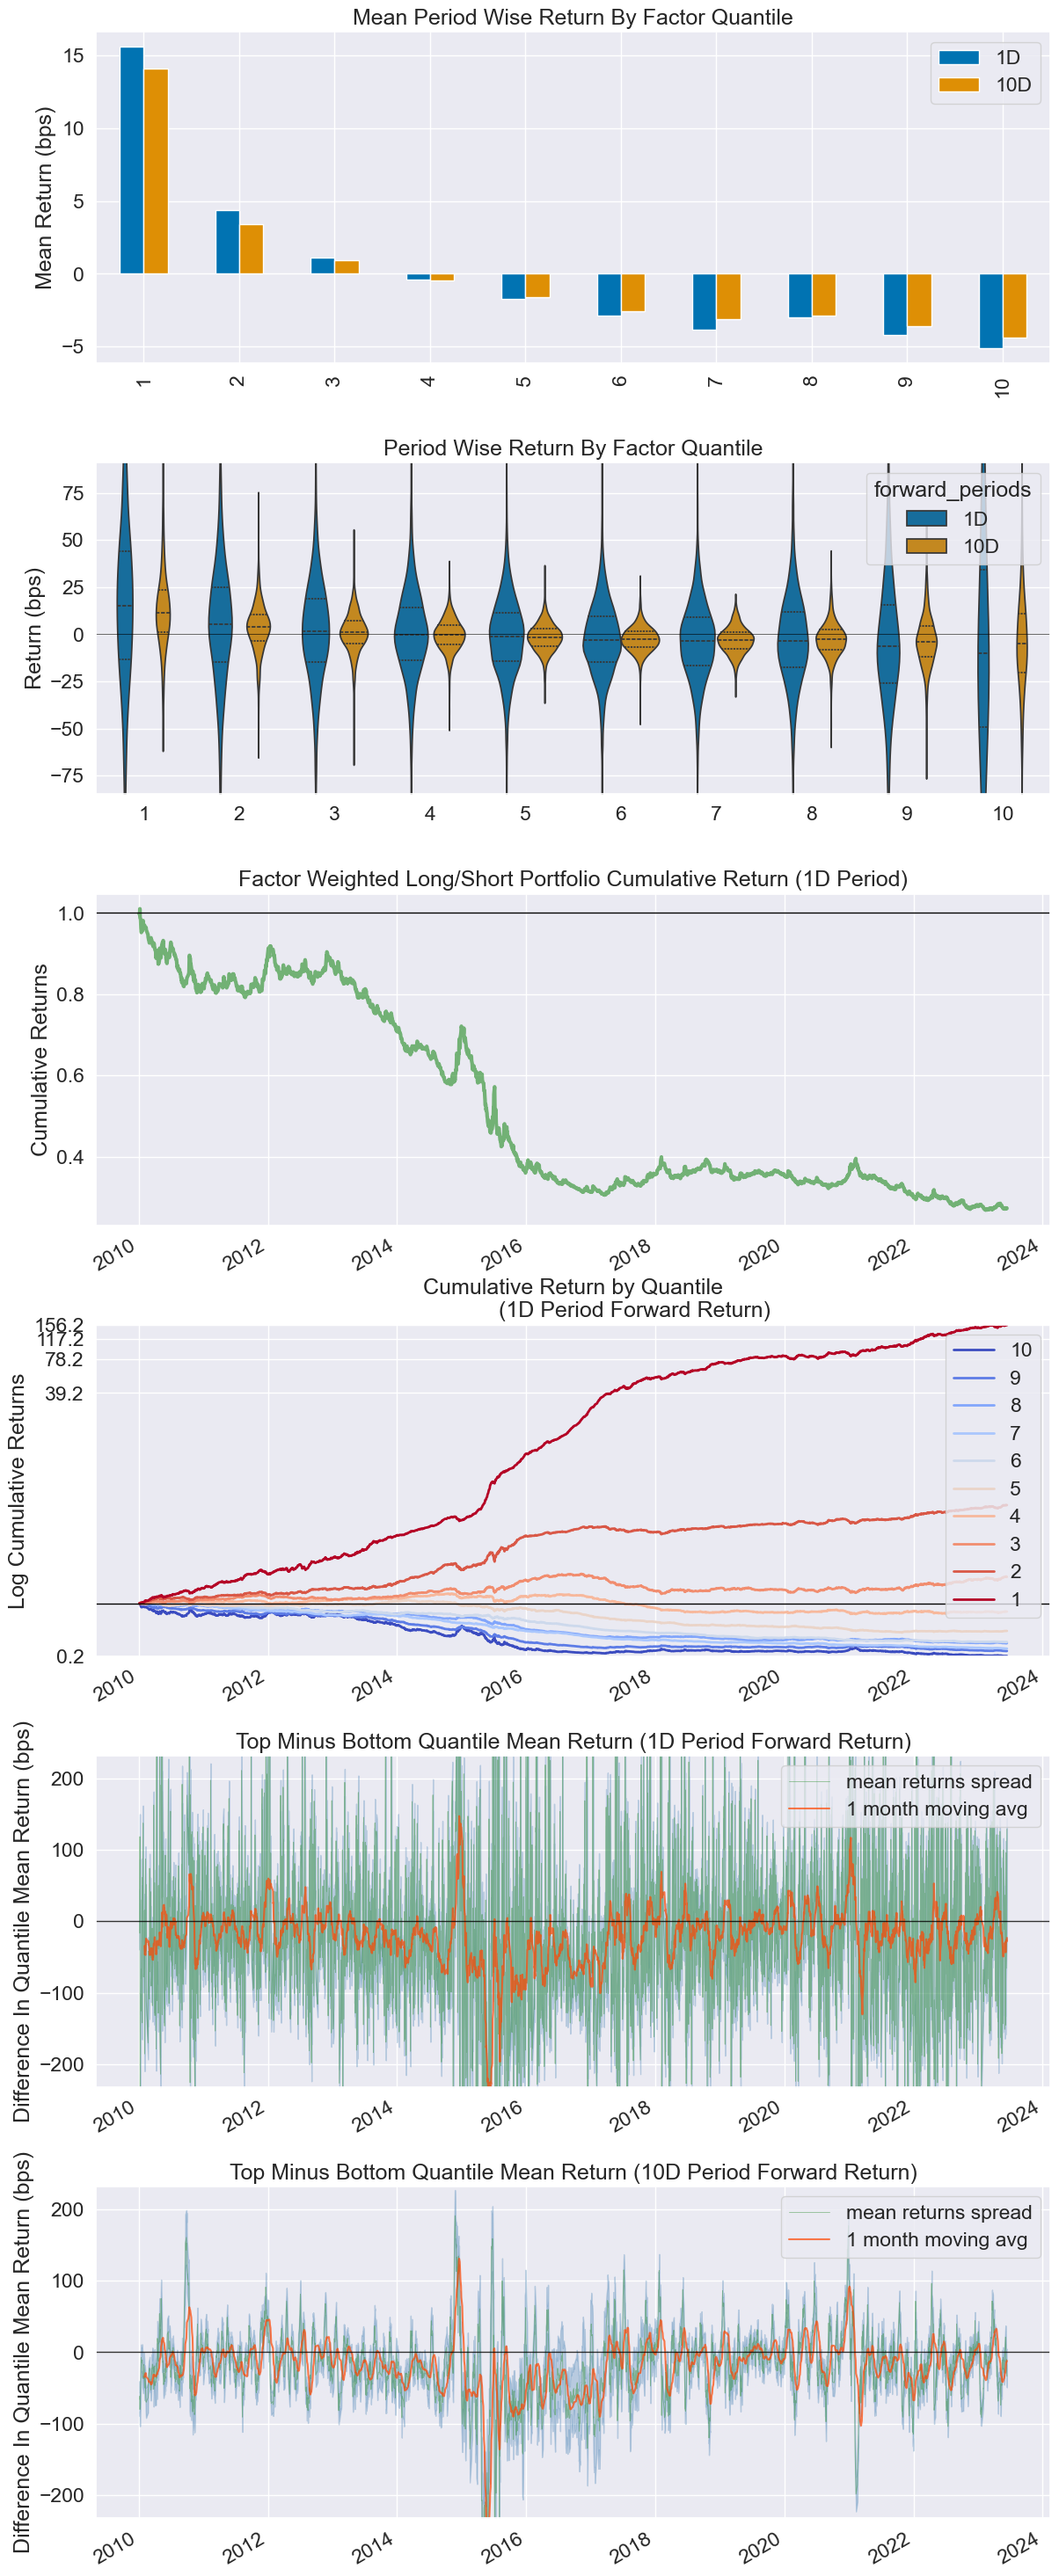

Information Analysis


,1D,10D
IC Mean,-0.021,-0.047
IC Std.,0.133,0.166
Risk-Adjusted IC,-0.160,-0.280
t-stat(IC),-9.149,-16.004
p-value(IC),0.000,0.000
IC Skew,0.297,0.321
IC Kurtosis,0.113,-0.166


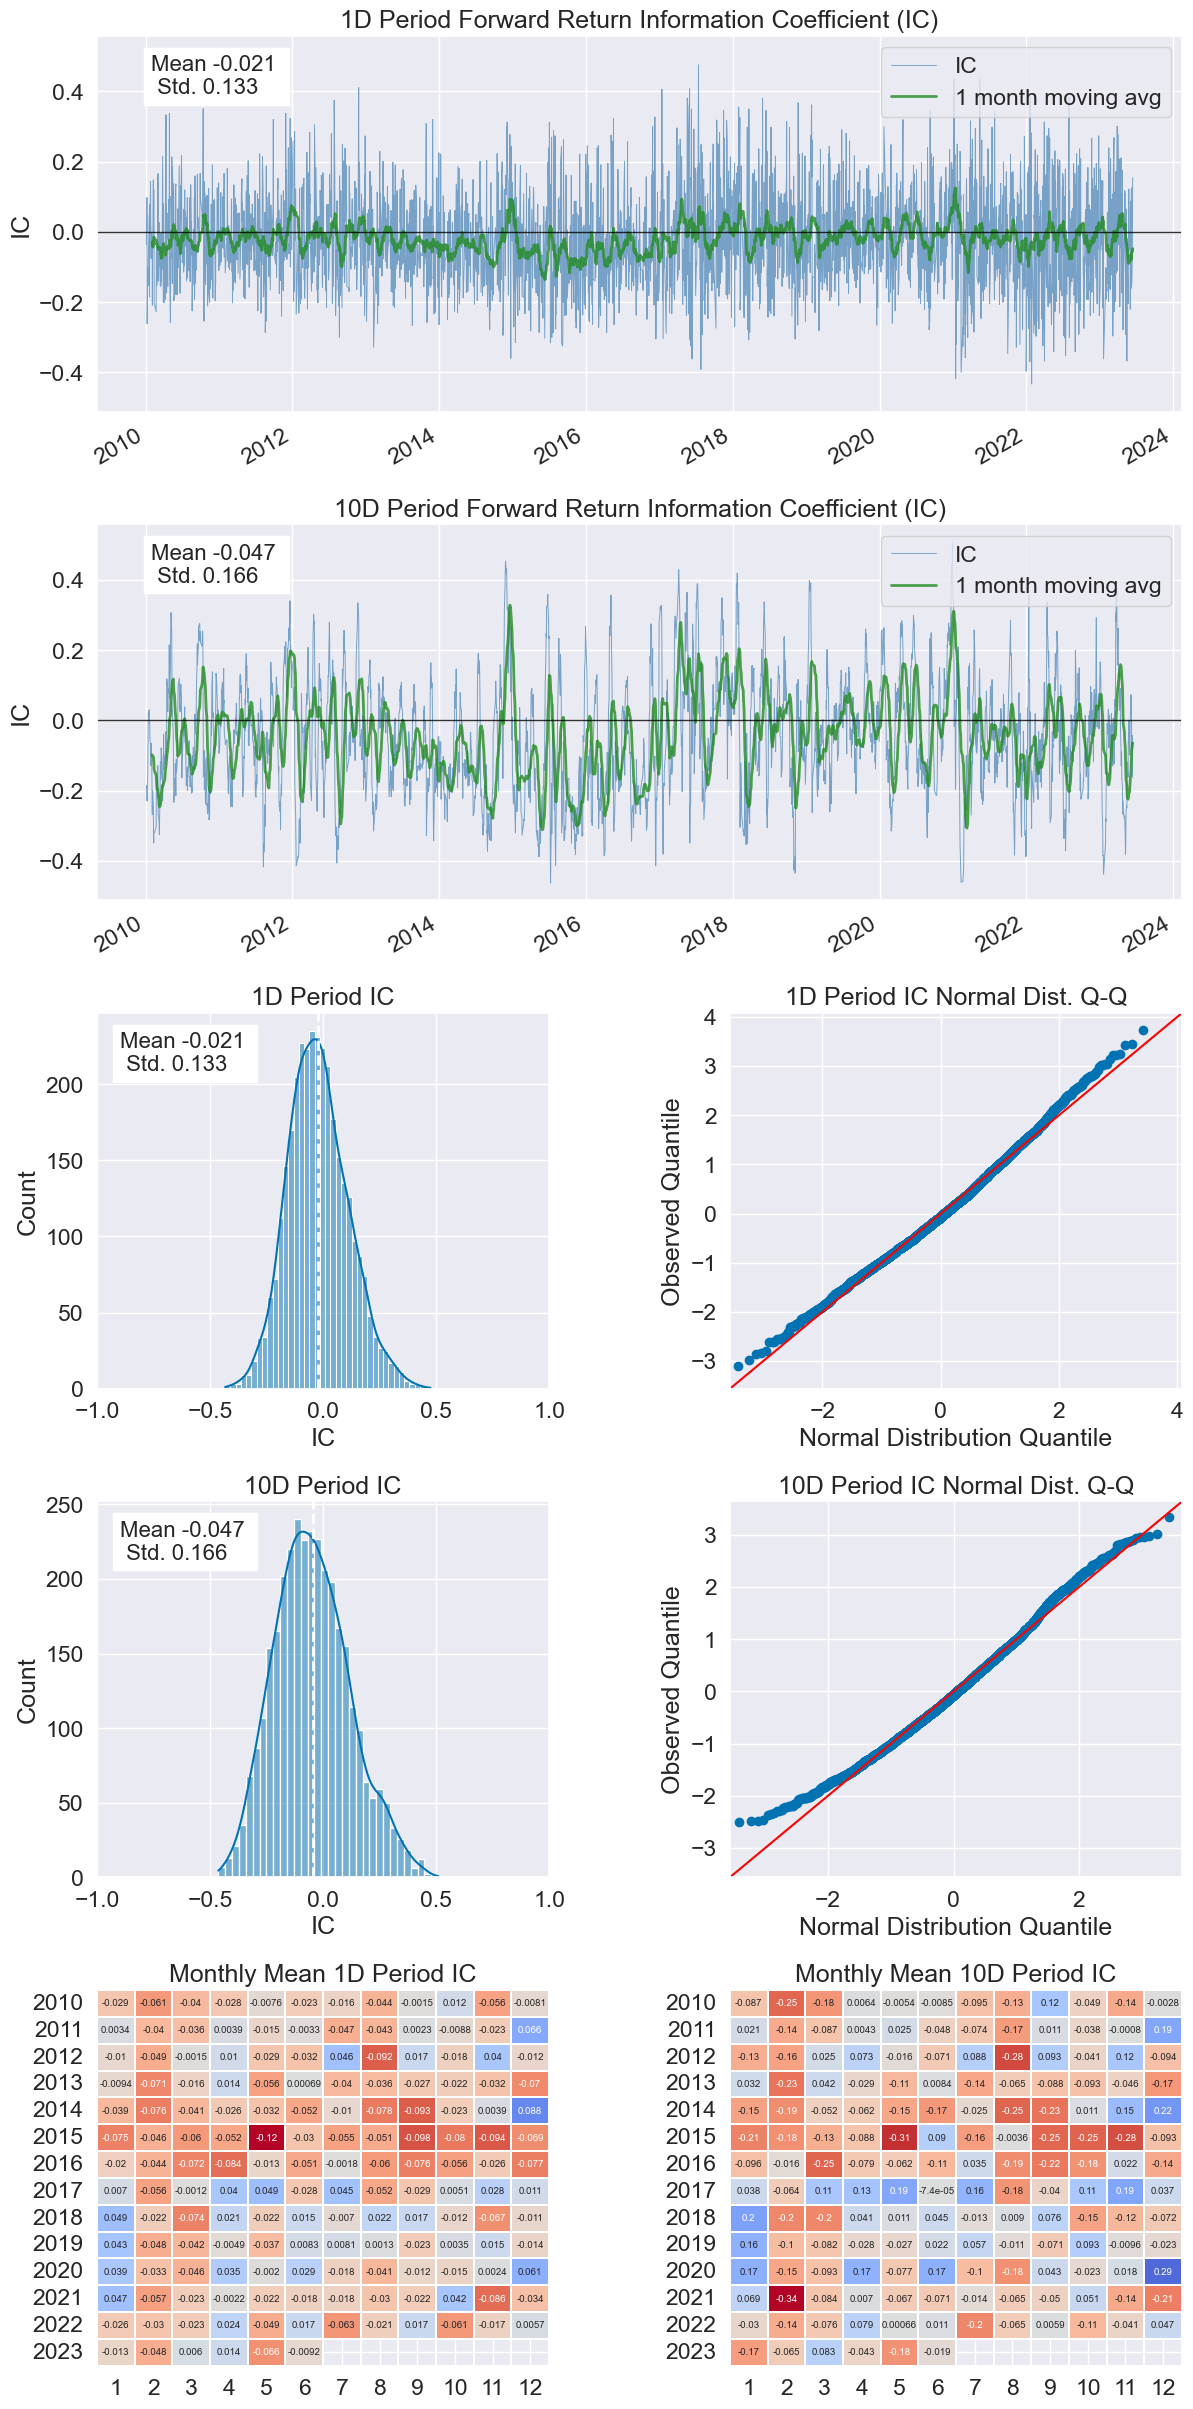

Turnover Analysis


,1D,10D
Quantile 1 Mean Turnover,0.034,0.110
Quantile 2 Mean Turnover,0.072,0.220
Quantile 3 Mean Turnover,0.086,0.261
Quantile 4 Mean Turnover,0.090,0.272
Quantile 5 Mean Turnover,0.088,0.267
Quantile 6 Mean Turnover,0.079,0.245
Quantile 7 Mean Turnover,0.065,0.203
Quantile 8 Mean Turnover,0.050,0.157
Quantile 9 Mean Turnover,0.035,0.108
Quantile 10 Mean Turnover,0.014,0.044


,1D,10D
Mean Factor Rank Autocorrelation,0.999,0.994


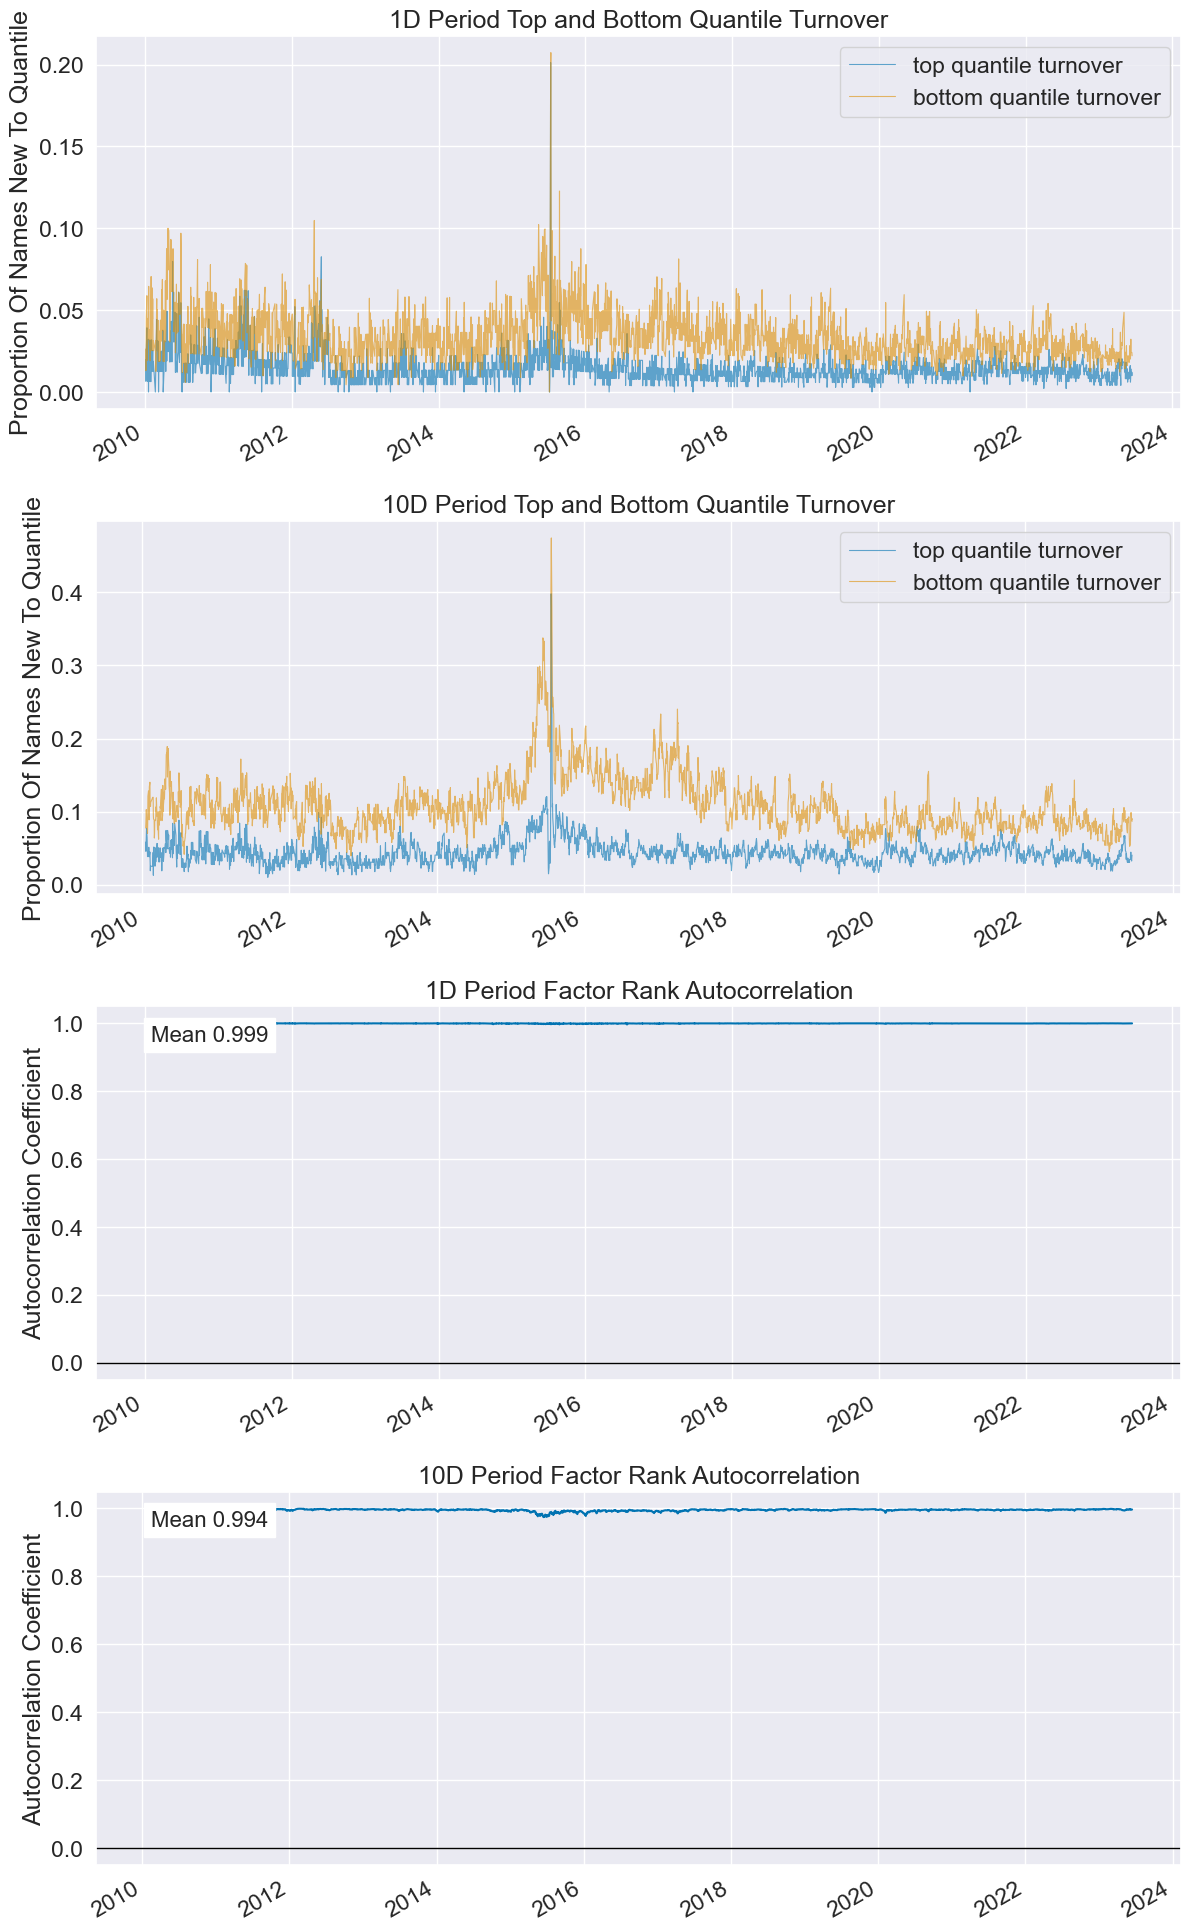

In [19]:

al.tears.create_full_tear_sheet(factor_data)